In [1]:
%load_ext autoreload
%autoreload 2
from astropy.coordinates import Distance
import bilby
from gwBackground import *
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import os
from pygwb.constants import H0
H0_si = H0.si.value
from pygwb.detector import Interferometer
from pygwb.network import Network
from pygwb.parameters import Parameters
from pygwb.baseline import Baseline
from pygwb.simulator import Simulator
import scipy
from scipy.integrate import trapz
from scipy.integrate import cumtrapz
from scipy.special import erfinv
import sys
sys.path.append('../code/')
from tqdm import tqdm

In [2]:
import matplotlib 
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fontsize = 9
# ALWAYS USE figsize = (3.375, X) for column plots 
# figsize = (6.75, X) for rows 
params = {
   'axes.labelsize': fontsize,
   'font.size': fontsize,
   'legend.fontsize': 8,
   'xtick.labelsize': fontsize,
   'ytick.labelsize': fontsize,
   'axes.titlesize':fontsize,
   'lines.linewidth':1,  
   'xtick.direction':'in',
   'ytick.direction':'in',
#    'text.usetex': True,
   'font.family':'Serif',
   'font.serif':'Hoefler Text',
   'axes.grid':True,
   'figure.figsize': (6.75, 4),
   'figure.dpi':250,
   'mathtext.fontset':'cm'
}

for param in params.keys():
    matplotlib.rcParams[param] = params[param]    

In [3]:
# Calculate the merger rate
def R(alpha, beta, z, z_p, R0):
    '''
    Equation from Callister et al. 2020.
    Calculates the merger rate at a given redshift.
    
    Parameters
    ----------
    alpha : double
        spectral index before peak z_p
    beta : double
        spectral index after peak z_p
    z : double
        redshift
    z_p : double
        peak redshift of merger rate
    R0 : double
        current merger rate (z = 0)
        
    Returns
    -------
    double
        merger rate at the given redshift
    '''
    return (C(alpha, beta, z_p)*((R0*((1+z)**alpha))/(1+(((1+z)/(1+z_p))**(alpha+beta)))))

def C(alpha, beta, z_p):
    '''
    Equation from Callister et al. 2020.
    Calculates the normalization constant for the merger rate.
    
    Parameters
    ----------
    alpha : double
        spectral index before peak z_p
    beta : double
        spectral index after peak z_p
    z_p : double
        peak redshift of merger rate
    
    Returns
    -------
    double
        normalization constant for the merger rate
    '''
    return (1+((1+z_p)**(-alpha-beta)))

def Hubble_rate(z, H0, omega_R, omega_M, omega_k, omega_lambda):
    '''
    Equation from Renzini et al. 2022.
    Calculates the Hubble rate as a function of redshift.
    
    Parameters
    ----------
    z : double
        redshift
    H0 : double
        Hubble constant (Hubble rate at z = 0)
    omega_R : double
        radiation component of energy density
    omega_M : double
        matter component of energy density
    omega_k : double
        spacetime curvature component of energy density
    omega_lambda : double
        dark energy component of energy density, cosmological constant
    
    Returns
    -------
    double
        Hubble rate for a given redshift z
    '''
    return H0*(((omega_R*((1+z)**4))+(omega_M*((1+z)**3))+(omega_k*((1+z)**2))+omega_lambda)**(1/2))

scale = 1

alpha = 1.9
beta = 3.4
z_p = 2.4
z_max = 10

H0 = 67.4 # Hubble constant (Hubble rate at z = 0)
omega_R = 9.182e-5 # radiation component of energy density
omega_M = 0.3111 # matter component of energy density
omega_k = 0 # spacetime curvature component of energy density
omega_lambda = 0.6889 # dark energy component of energy density, cosmological constant
R0 = 28.3 # current merger rate

dz = 0.01
zsMerger = np.arange(0.,z_max,dz)

mergerRate = []
for i in range(len(zsMerger)):
    mergerRate.append(R(alpha, beta, zsMerger[i], z_p, R0))
mergerRate = np.array(mergerRate)

13:28 bilby INFO    : Using aligned spin prior
13:28 bilby INFO    : No prior given, using default BBH priors in /Users/olivialaske/opt/anaconda3/envs/igwn-py39-lw/lib/python3.9/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


2.6009794384205174
Total number of injections: 3


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:33.124 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 3 injections
100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 75.80it/s]
2023-08-09 13:28:33.190 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:33.191 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:33.191 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=3.69e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 2


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:36.250 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 2 injections
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 132.33it/s]
2023-08-09 13:28:36.266 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:36.267 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:36.267 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=7.04e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 3


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:39.231 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 3 injections
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 241.51it/s]
2023-08-09 13:28:39.245 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:39.245 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:39.246 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=2.06e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 2


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:42.118 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 2 injections
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 207.57it/s]
2023-08-09 13:28:42.129 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:42.129 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:42.130 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=1.46e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 4


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:44.987 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 4 injections
100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 260.17it/s]
2023-08-09 13:28:45.004 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:45.004 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:45.005 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=8.84e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 3


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:47.868 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 3 injections
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 226.36it/s]
2023-08-09 13:28:47.883 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:47.883 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:47.884 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=4.53e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 1


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:50.738 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 1 injections
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 184.34it/s]
2023-08-09 13:28:50.745 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:50.746 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:50.746 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=3.95e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 1


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:53.634 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 1 injections
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 132.79it/s]
2023-08-09 13:28:53.643 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:53.644 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:53.644 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=1.52e-09
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 2


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:56.462 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 2 injections
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 229.97it/s]
2023-08-09 13:28:56.472 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:56.473 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:56.473 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=2.88e-10
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 5


13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:28:59.316 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 5 injections
100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 233.62it/s]
2023-08-09 13:28:59.339 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:28:59.340 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:28:59.340 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=1.67e-09
13:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 2


13:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:29:02.249 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 2 injections
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 234.57it/s]
2023-08-09 13:29:02.258 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:29:02.259 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:29:02.259 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=3.65e-10
13:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Total number of injections: 3


13:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
2023-08-09 13:29:05.111 | INFO     | pygwb.simulator:compute_injected_Omega:745 - Compute the total injected Omega for 3 injections
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 237.32it/s]
2023-08-09 13:29:05.125 | DEBUG    | pygwb.simulator:compute_injected_Omega:773 - Compute Omega_ref at f_ref=25 Hz
2023-08-09 13:29:05.125 | DEBUG    | pygwb.simulator:compute_injected_Omega:778 - True f_ref=25.0
2023-08-09 13:29:05.126 | INFO     | pygwb.simulator:compute_injected_Omega:781 - Omega_ref=2.61e-09
13:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary

Omega_ref at 25 Hz: 2.61e-09


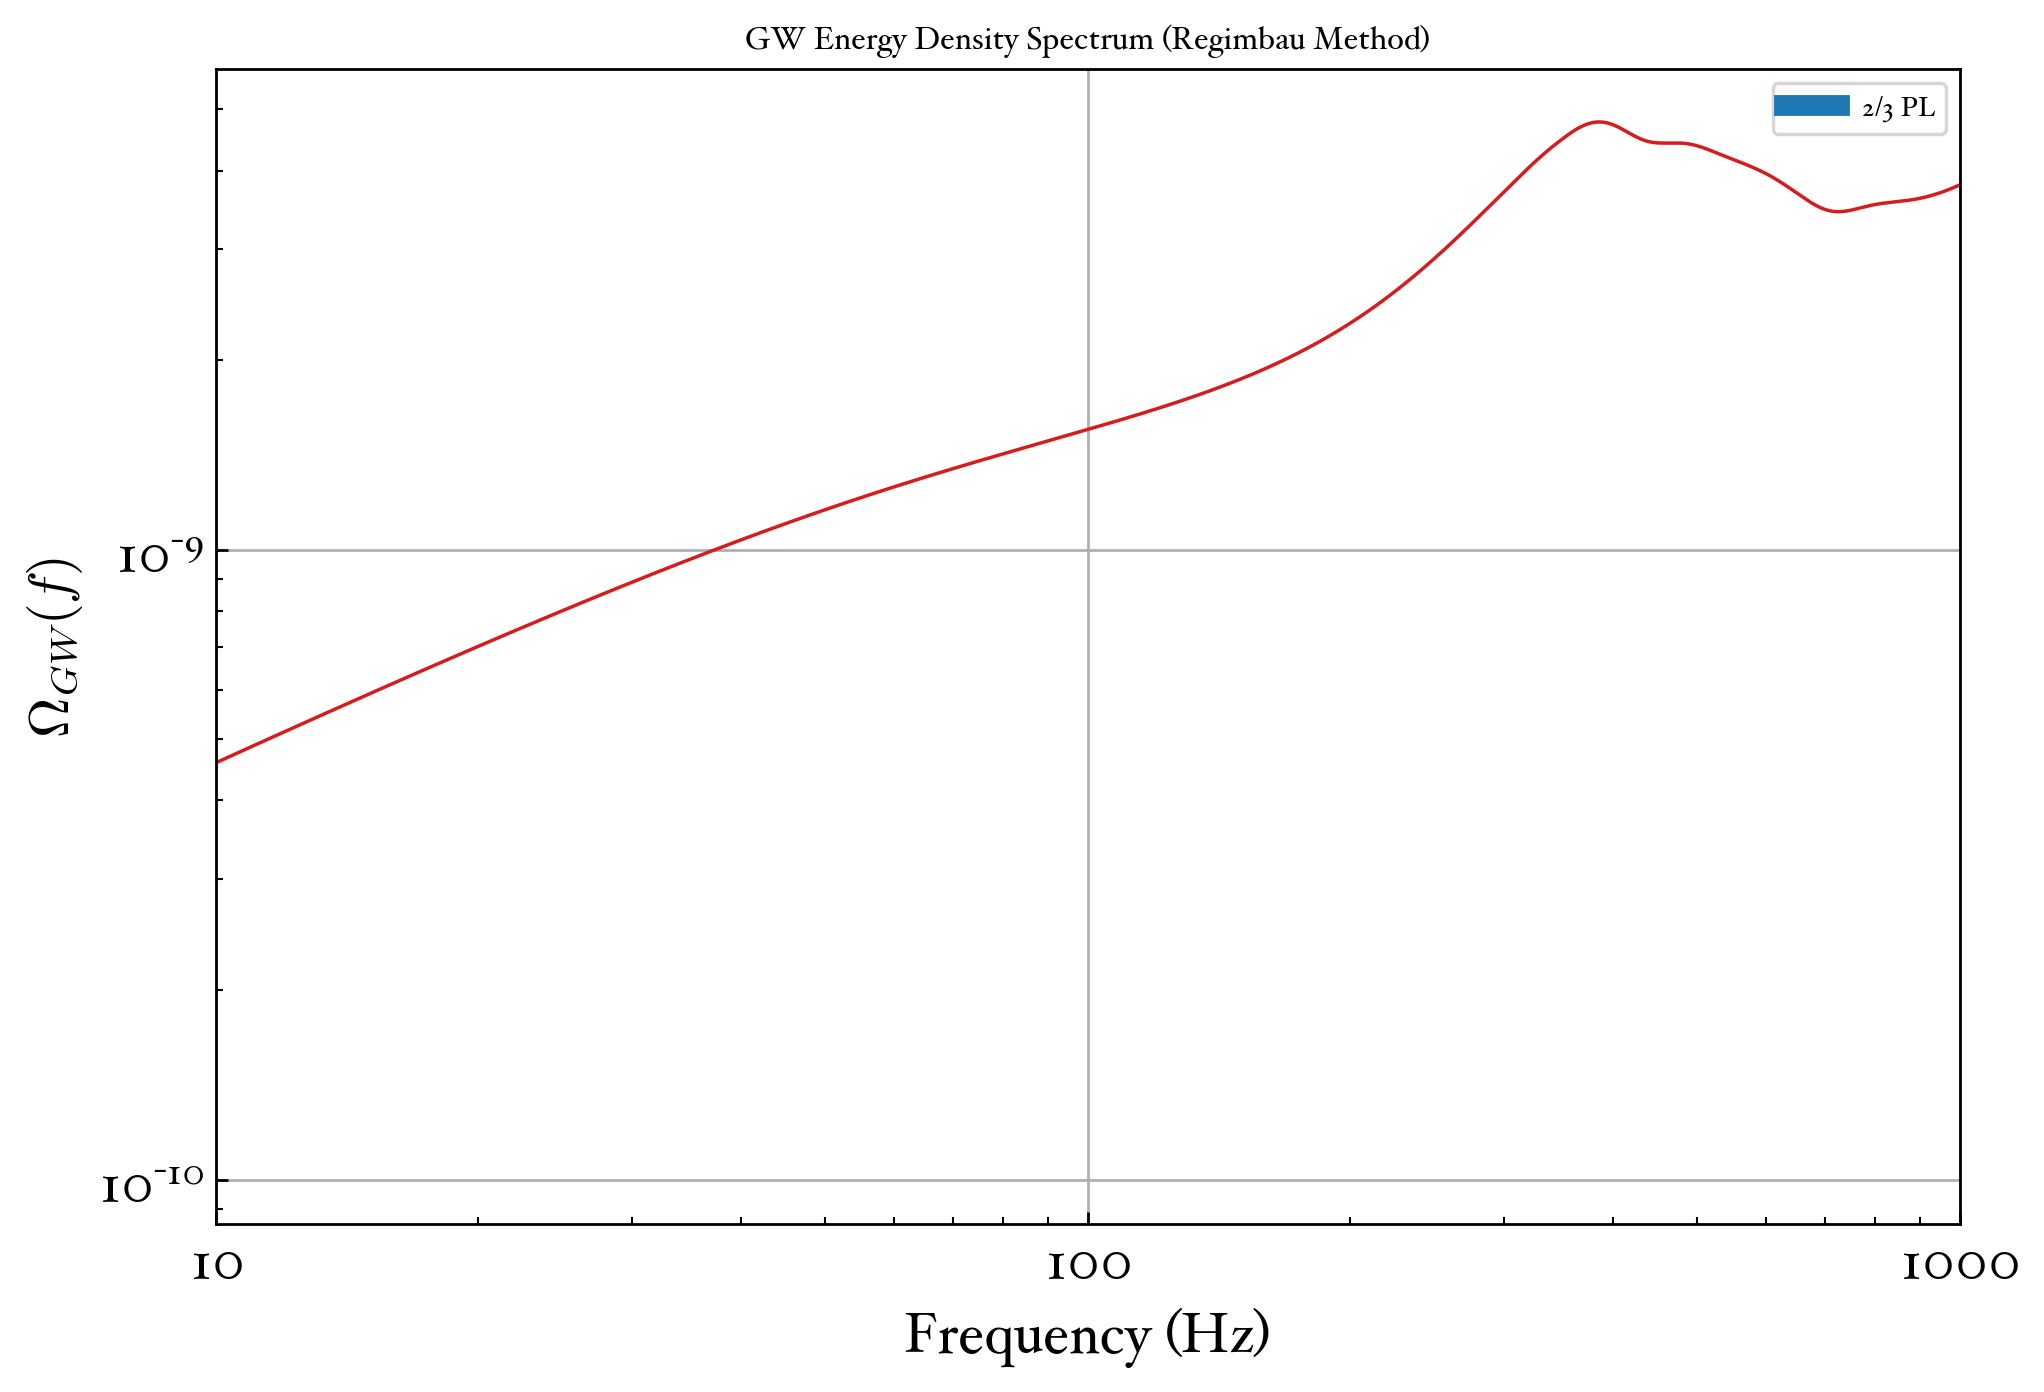

In [4]:
from bilby.gw.prior import Cosmological
# Define redshift prior
class PowerLawRedshiftPrior(Cosmological):
    def __init__(self, minimum, maximum, R0, alpha, beta, zp, **kwargs):
        self.R0 = R0
        self.alpha = alpha
        self.beta = beta
        self.zp = zp
        super(PowerLawRedshiftPrior, self).__init__(minimum=minimum, maximum=maximum, **kwargs)
        
    def _get_redshift_arrays(self):
        zs = np.linspace(self._minimum['redshift'] * 0.99,
                         self._maximum['redshift'] * 1.01, 1000)
        C = 1 + (1 + self.zp)**(-self.alpha - self.beta)
        p_dz = (1/(1+zs)) * C * ((self.R0 * (1 + zs)**(self.alpha))/(1 + ((1 + zs)/(1 + self.zp))**(self.alpha + self.beta))) * 4 * np.pi * self.cosmology.differential_comoving_volume(zs).value
        return zs, p_dz
    
# Initial parameters for the Regimbau method
T_obs = (1/365.25/24) # in yrs
# T_obs = 10
fmin = 10
duration = T_obs*60*60*24*365.25 # Duration of each segment of data [s]
# duration = 100
N_segs = 1  # Number of data segments to generate
# N_segs = int(T_obs / duration)
fs = 2048 # Sampling rate [Hz]

# Calculate number of injections
zs, p_dz = priors['redshift']._get_redshift_arrays()
p_dz_centers = (p_dz[1:] + p_dz[:-1])/2.
total_sum = np.sum(np.diff(zs) * p_dz_centers)
N = T_obs * total_sum
print(N)

# Define priors for the parameters in the Regimbau method
priors = bilby.gw.prior.BBHPriorDict(aligned_spin=True)
# priors['chirp_mass'] = bilby.core.prior.Uniform(2, 30, name="chirp_mass")
# priors['mass_ratio'] = 1.0
# priors['mass_1'] = bilby.core.prior.LogUniform(5,50)
# priors['mass_2'] = bilby.core.prior.Uniform(5,50)
priors['mass_1'] = bilby.core.prior.PowerLaw(alpha=-2.3, minimum=5, maximum=50)
priors['mass_ratio'] = bilby.core.prior.PowerLaw(alpha=1.5, minimum=0, maximum=1)
priors['chi_1'] = 0
priors['chi_2'] = 0
priors['theta_jn'] = bilby.core.prior.Uniform(0, 2*np.pi, name='theta_jn') # bilby.core.prior.Cosine()
priors['redshift'] = PowerLawRedshiftPrior(R0=R0, alpha=alpha, beta=beta, zp=z_p, name='redshift', minimum=0, maximum=10)
priors["geocent_time"] = bilby.core.prior.Uniform(0, T_obs, name='geocent_time')

num_iterations = 12
total_freqs_AR = []
total_Omega_GW_AR = []
total_Omega_ref_AR = 0
for i in range(num_iterations):
    # Create injections
    N_inj = np.random.poisson(N.value)
    print('Total number of injections: ' + str(N_inj))
    injections = priors.sample(N_inj)
    injections["signal_type"] = 'CBC'
    import json
    with open("test_CBC_injection_dict.json", "w") as outfile:
        json.dump(injections, outfile, indent=2, cls=bilby.core.result.BilbyJsonEncoder
    )

    ifo_H1 = bilby.gw.detector.get_empty_interferometer('H1')
    ifo_L1 = bilby.gw.detector.get_empty_interferometer('L1')

    ifo_list = [ifo_H1, ifo_L1]

    for ifo in ifo_list:
        ifo.duration = duration
        ifo.sampling_frequency = fs
        ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity\
        (ifo.frequency_array, 1e-3 * np.nan_to_num(ifo.power_spectral_density_array, posinf=1.e-41))

    simulator_cbc = Simulator(ifo_list, N_segs, duration=duration, injection_dict=injections,
                                           sampling_frequency=fs, no_noise=False)
    freqs_AR, Omega_GW = simulator_cbc.compute_injected_Omega(return_spectrum=True, waveform_duration=4)
    Omega_ref = simulator_cbc.compute_injected_Omega(return_spectrum=False, waveform_duration=4)/scale
    
    if i == 0:
        total_freqs_AR = freqs_AR
        total_Omega_GW_AR = Omega_GW
        total_Omega_ref_AR = Omega_ref
    else:
        for j in range(len(freqs_AR)):
            total_freqs_AR[j] = total_freqs_AR[j]+freqs_AR[j]
            total_Omega_GW_AR[j] = total_Omega_GW_AR[j]+Omega_GW[j]
            
    total_Omega_ref_AR = total_Omega_ref_AR+Omega_ref
    
for i in range(len(total_freqs_AR)):
    total_freqs_AR[i] = total_freqs_AR[i]/num_iterations
    total_Omega_GW_AR[i] = total_Omega_GW_AR[i]/num_iterations
    total_Omega_ref_AR = total_Omega_ref_AR/num_iterations
        
# Plot spectrum
plt.figure(figsize=(9,6))
ax = plt.gca()
ax.loglog(total_freqs_AR, total_Omega_GW_AR, color='#d61c1c')
ax.loglog(total_freqs_AR, total_Omega_ref_AR * (total_freqs_AR / 25)**(2/3), label='2/3 PL')

ax.set_xlim(10, 1000)
ax.set_title(r'GW Energy Density Spectrum (Regimbau Method)')
ax.set_xlabel(r'Frequency (Hz)', fontsize=16)
ax.set_ylabel(r'$\Omega_{GW}(f)$', fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.legend()

print('Omega_ref at 25 Hz: ' + format(Omega_ref, '.2e'))

/var/folders/ll/kr0d3dk97nscjzcx85rrjmz00000gn/T/ipykernel_314/4097138175.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/ll/kr0d3dk97nscjzcx85rrjmz00000gn/T/ipykernel_314/4097138175.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


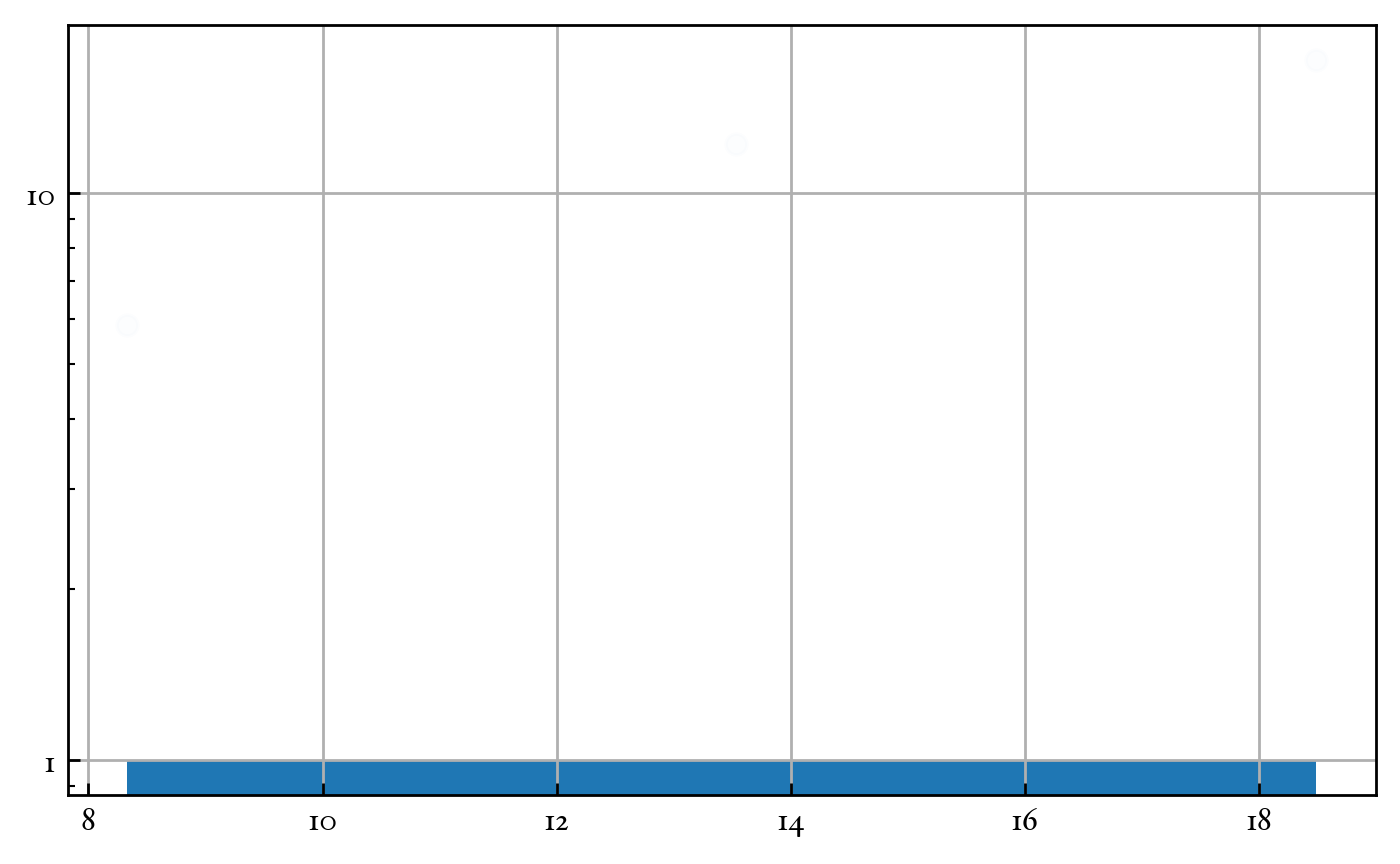

In [5]:
injections['mass_2'] = injections['mass_ratio'] * injections['mass_1']
fig, ax = plt.subplots()
ax.scatter(injections['mass_1'], injections['mass_2'], alpha=0.01)
fig.show()

ax.hist((injections['mass_1']), bins='auto')
ax.set_yscale("log")
fig.show()

/var/folders/ll/kr0d3dk97nscjzcx85rrjmz00000gn/T/ipykernel_314/3727113348.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


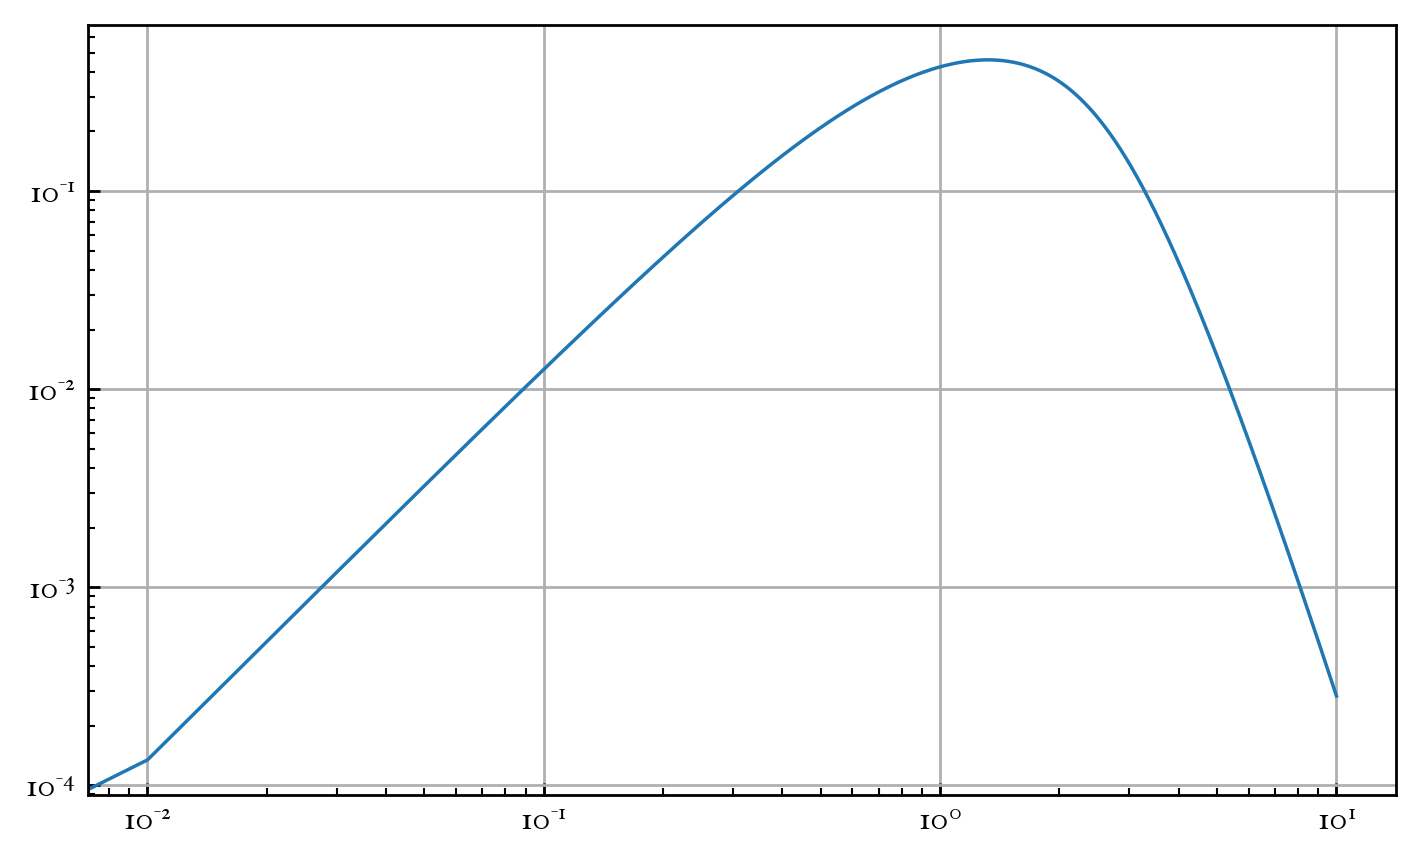

In [6]:
zs = np.linspace(0, 10, num=1000)
fig, ax = plt.subplots()
ax.loglog(zs, priors['redshift'].prob(zs))
fig.show()

[ 10.          10.33933849  10.69019205  11.05295141
  11.4280206   11.81581733  12.21677349  12.63133564
  13.05996548  13.50314038  13.96135391  14.43511639
  14.92495545  15.43141664  15.955064    16.49648074
  17.05626983  17.63505472  18.23348001  18.85221217
  19.4919403   20.15337686  20.83725851  21.5443469
  22.27542952  23.03132059  23.81286195  24.62092401
  25.45640674  26.32024061  27.21338768  28.13684268
  29.09163406  30.07882518  31.0995155   32.15484177
  33.24597932  34.37414337  35.54059037  36.74661941
  37.99357365  39.28284185  40.61585988  41.99411235
  43.41913423  44.89251258  46.41588834  47.99095809
  49.61947603  51.30325585  53.0441728   54.84416576
  56.70523941  58.62946646  60.61898993  62.6760256
  64.8028644   67.00187504  69.27550656  71.62629116
  74.05684692  76.5698808   79.16819159  81.85467307
  84.63231721  87.5042175   90.47357242  93.54368899
  96.71798643 100.        ]
[0.1       0.1140625 0.128125  0.1421875 0.15625   0.1703125
 0.184375  0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ll/kr0d3dk97nscjzcx85rrjmz00000gn/T/ipykernel_314/2586801138.py:110: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


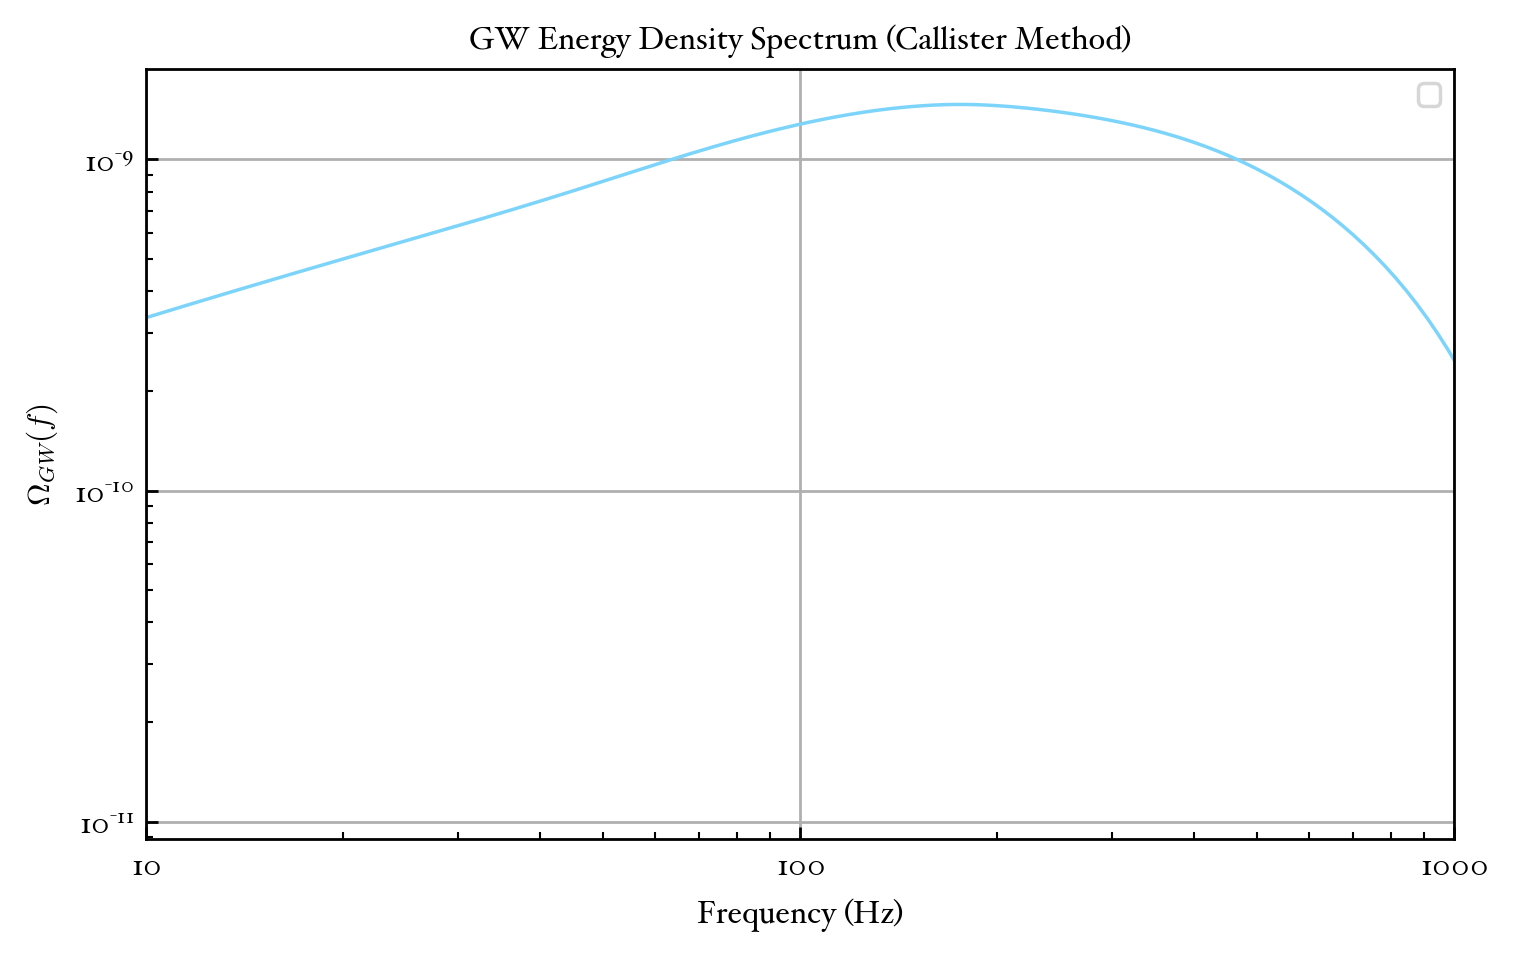

In [7]:
# Steps 3 and 4 of the Callister method
##########################################################
# Step 3: Set up Omega(f) and define the mass distribution
##########################################################

# In this final stage, we'll do things in a slightly counterintuitive order.
# We'll start by defining an OmegaGW *object* that will serve as our Omega(f) calculator.
# Once this object is defined, we will need to give it a set of weights so that it knows
# how to integrate over the range of possible NSBH masses.
# These weights are how we specify our mass distribution.
# Once this is done, then we can finally compute Omega(f)!

# Set up our OmegaGW object.
m1_min = 5.                         # Minimum BH mass
m1_max = 50.                        # Maximum BH mass
# m2_min = 1.                         # Minimum NS mass
# m2_max = 2.5                        # Maximum NS mass
m2_min = 5.
m2_max = 50.
fmax = 3000.                        # Maximum frequency we want to consider
inspiralOnly=False                  # Include contributions from merger and ringdown
minimum_component_mass = m2_min
maximum_component_mass = m1_max
# omg = OmegaGW(minimum_component_mass,maximum_component_mass,zsMerger,fmax,inspiralOnly,
#         Mtots=np.logspace(np.log10(m1_min+m2_min),np.log10(m1_max+m2_max),40), 
#         qs=np.linspace(m2_min/m1_max,m2_max/m1_min,41))
omg = OmegaGW_BBH(minimum_component_mass,maximum_component_mass,zsMerger)

# In the two preceding lines of code, we used the Mtots=... and qs... arguments
# to set up a grid over the possible total masses and mass ratios for NSBH binaries.
# The OmegaGW will calculate the gravitational-wave emission for every point in this grid,
# and then integrate over the emission from every grid point.
# Exactly *how* this emission is summed up is determined by the mass distribution that we specify below.
# Specifically, we will define a 2D array of probabilities p(lnMtot,q)=dP/(dlnMtot*dq) associated with every grid point.
# Then the integral computed by OmegaGW will be of the form
#
# Total = \int (energy from one grid point)*probs(Mtot,q)*dlnMtot*dq
#
# In this script, I will assume a mass distribution that is uniform in m2 and log-uniform in m1:
# 
# dP/(dm1*dm2) \propto 1/m1
#
# Note, though, that I've defined this mass distribution in the space of (m1,m2).
# Because of the way we've set up our integration grid, however, I need to know the equivalent
# distribution in the space of (lnMtot,q). This means that we will need to calculate a *Jacobian*
# factor to convert from dP/dm1*dm2 to the quantity that we need for our integral dP/dlnMtot*dq
#
# dP/dlnMtot*dq = (dP/dm1*dm2)*Jacobian
#               = (dP/dm1*dm2)*d(m1,m2)/d(lnMtot,q)
#               = (dP/dm1*dm2)*Mtot**2/(1+q)**2

# Define the probabilities in (m1, m2) space using the specified bilby priors
# Multiply by the Jacobian to translate between (m1,m2) and (lnMtot,q)

# probs = omg.Mtots_2d**2./(1.+omg.qs_2d)**2.
# probs /= omg.m1s_2d

# Calculate probabilities based on the Regimbau method 
# Priors defined in (m1, m2) space
# probs = np.empty((omg.m1s_2d.shape[0],omg.m2s_2d.shape[1])) # initialize array
# for i in range(omg.m1s_2d.shape[0]): # for each m1
#     for j in range(omg.m2s_2d.shape[1]): # for each m2
#         prob = priors.prob({'mass_1':omg.m1s_2d[i][j], 'mass_2':omg.m2s_2d[i][j]}) # calculate probability
#         probs[i][j] = prob # insert probability into probability array
# probs = probs*(omg.Mtots_2d**2./(1.+omg.qs_2d)**2.) # multiply by the Jacobian

# Priors defined in (m1, q) space
probs = np.empty((omg.m1s_2d.shape[0],omg.qs_2d.shape[1])) # initialize array
for i in range(omg.m1s_2d.shape[0]): # for each m1
    for j in range(omg.qs_2d.shape[1]): # for each m2
        prob = priors.prob({'mass_1':omg.m1s_2d[i][j], 'mass_ratio':omg.qs_2d[i][j]}) # calculate probability
        probs[i][j] = prob # insert probability into probability array
probs = probs*(omg.Mtots_2d/(1.+omg.qs_2d)) # multiply by the Jacobian

# Now make sure that we're specifying physical masses for our BH and NS components
probs[omg.m1s_2d<m1_min] = 0
probs[omg.m1s_2d>m1_max] = 0
probs[omg.m2s_2d<m2_min] = 0
probs[omg.m2s_2d>m2_max] = 0

# Finally, normalize the probabilities and give them to our OmegaGW calculator!
probs /= np.sum(probs)
omg.probs = probs

##############################
# Step 4. Calculage Omega(f)!
##############################

# Now that we've gone through all the work to define our mass distribution, we can calculate Omega(f) from NSBH mergers.
# This is done using OmegaGW.eval(), which takes three arguments:
#   * Local merger rate
#   * Evolution of the merger rate with redshift
#   * Frequencies at which we want Omega(f) defined

freqs_TC = np.logspace(0,3.2,200)
omega_f = omg.eval(R0,mergerRate,freqs_TC)

# Save output
backgroundData = {'OmgGW':omega_f,'f':freqs_TC}
np.save("omegaGW_savedNSBH.npy",backgroundData)

# Plot
fig, ax = plt.subplots()
ax.loglog(freqs_TC, omega_f, color='#7dd4fa')
ax.set_title(r'GW Energy Density Spectrum (Callister Method)')
ax.set_xlabel(r'Frequency (Hz)')
ax.set_ylabel(r'$\Omega_{GW}(f)$')
ax.set_xlim(10, 1000)
ax.legend()
fig.show()

/var/folders/ll/kr0d3dk97nscjzcx85rrjmz00000gn/T/ipykernel_314/3177031445.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


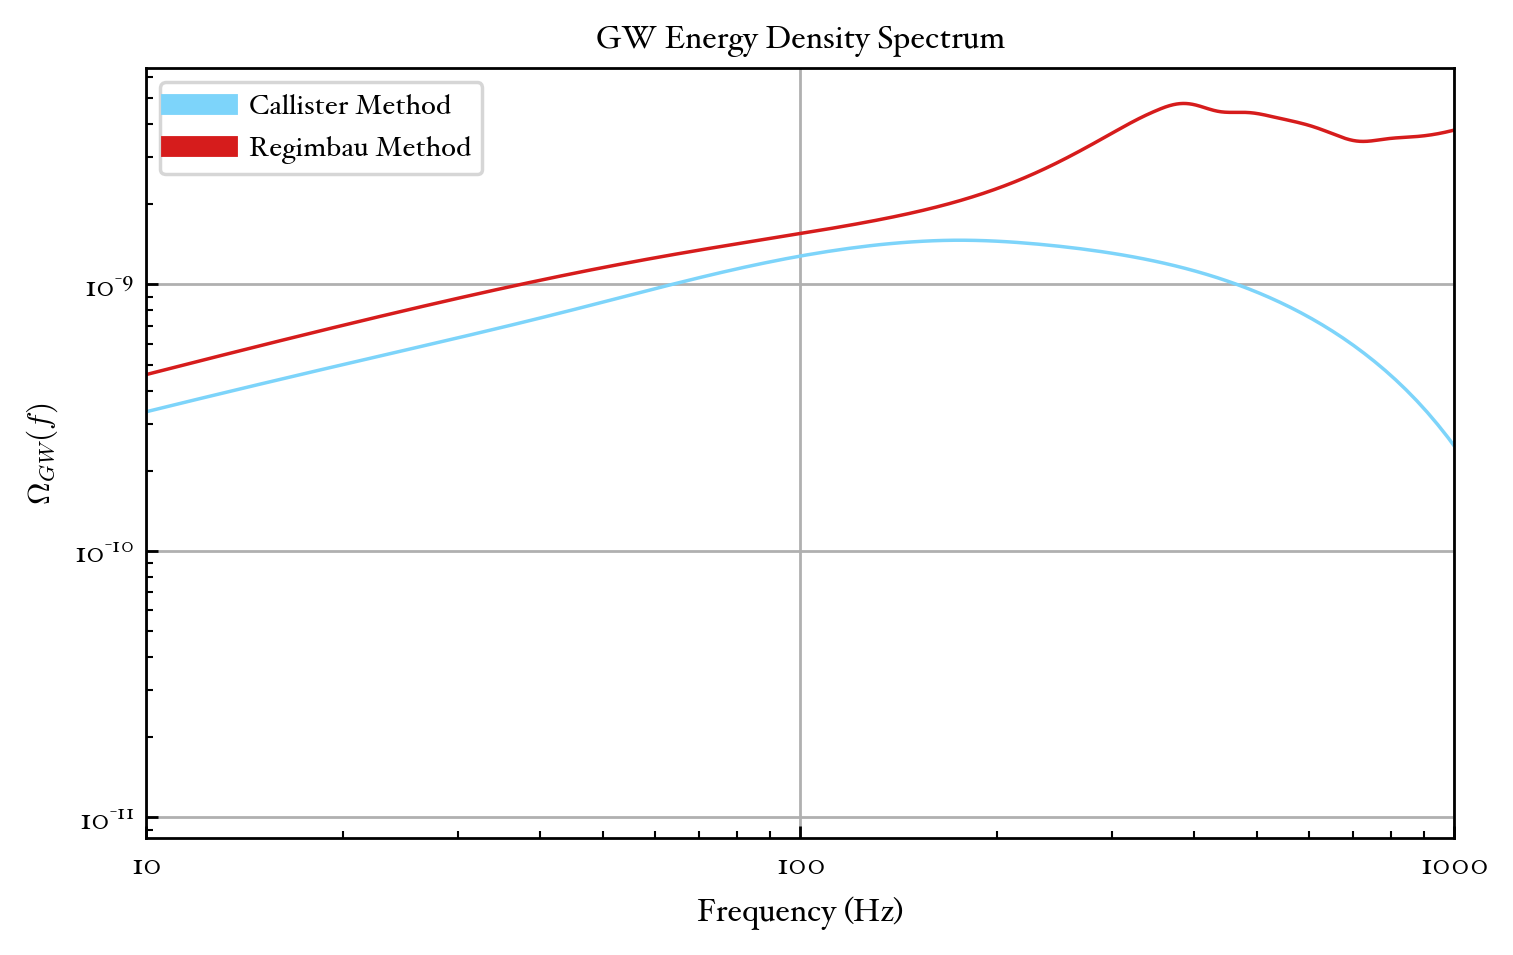

In [8]:
fig, ax = plt.subplots()
ax.loglog(freqs_TC, omega_f, color='#7dd4fa', label='Callister Method')
ax.loglog(total_freqs_AR, total_Omega_GW_AR, color='#d61c1c', label='Regimbau Method')
ax.set_title(r'GW Energy Density Spectrum')
ax.set_xlabel(r'Frequency (Hz)')
ax.set_ylabel(r'$\Omega_{GW}(f)$')
ax.set_xlim(10,1000)
ax.legend()
fig.show()